# 📘 03 - Confidence Intervals Explained via Story

🔹 **Objective**: Deep dive into confidence intervals using relatable scenarios from Cafe Zenith, including definitions, calculations, assumptions, visualizations, and simulations.

## ☕ Story: Measuring Improvement with Confidence
Priya, Cafe Zenith’s manager, noticed that their loyalty program might be boosting customer satisfaction.
She says:
> “We surveyed 50 customers last month and got an average satisfaction score of 4.3 out of 5. Can we be *confident* this reflects the larger customer base?”

You explain that point estimates like **sample means** are useful, but not enough. She needs a **confidence interval** — a range of values that likely includes the true population mean.

## 🔍 What is a Confidence Interval (CI)?
A confidence interval gives a **range** of plausible values for a population parameter based on sample data.

It is constructed as:

> **CI = point estimate ± margin of error**

The margin of error depends on the sample's variability and size.


### 🔢 Formal Definition
For a 95% confidence level:
> *“We are 95% confident that the true population mean lies within this interval.”*

This does **not** mean there's a 95% chance the mean is in the interval. Instead, 95% of similarly constructed intervals from different samples would contain the true mean.

### 🧠 When to Use CIs
- When estimating a **population mean or proportion**
- To **compare groups** (e.g., before vs. after program)
- To quantify **uncertainty** in business decisions

## 🧪 Simulating Customer Ratings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
np.random.seed(42)

# Simulate sample of 50 customer ratings (scale 1-5)
sample = np.random.normal(loc=4.3, scale=0.4, size=50)
mean = sample.mean()
sem = stats.sem(sample)

print("Sample Mean:", round(mean, 3))
print("Standard Error:", round(sem, 3))

Sample Mean: 4.21
Standard Error: 0.053


## 📏 Calculating 95% and 99% Confidence Intervals

In [2]:
# 95% and 99% CIs using t-distribution
ci_95 = stats.t.interval(0.95, df=len(sample)-1, loc=mean, scale=sem)
ci_99 = stats.t.interval(0.99, df=len(sample)-1, loc=mean, scale=sem)

print("95% CI:", ci_95)
print("99% CI:", ci_99)

95% CI: (np.float64(4.1036721451432605), np.float64(4.315948730651828))
99% CI: (np.float64(4.06826533827188), np.float64(4.351355537523208))


## 🎯 Visualizing Confidence Intervals

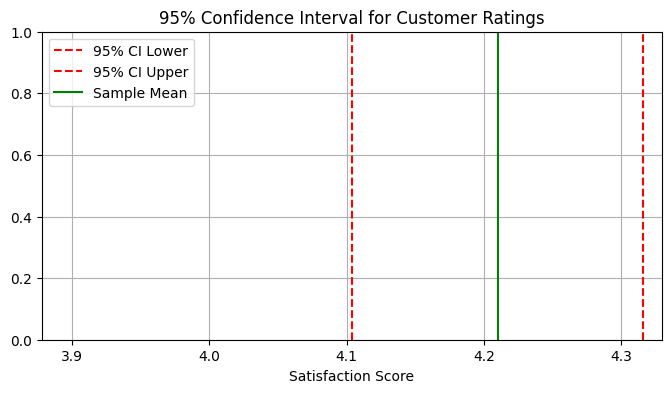

In [3]:
plt.figure(figsize=(8, 4))
plt.axvline(ci_95[0], color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_95[1], color='red', linestyle='--', label='95% CI Upper')
plt.axvline(mean, color='green', label='Sample Mean')
plt.title("95% Confidence Interval for Customer Ratings")
plt.xlabel("Satisfaction Score")
plt.legend()
plt.grid(True)
plt.show()

## 🔁 Bootstrapping Confidence Interval
Let’s use bootstrapping to compute a CI without assuming normality. This method resamples the sample many times.

In [4]:
boot_means = [np.mean(np.random.choice(sample, size=50, replace=True)) for _ in range(1000)]
boot_ci = np.percentile(boot_means, [2.5, 97.5])

print("Bootstrapped 95% CI:", boot_ci)

Bootstrapped 95% CI: [4.106157   4.31802391]


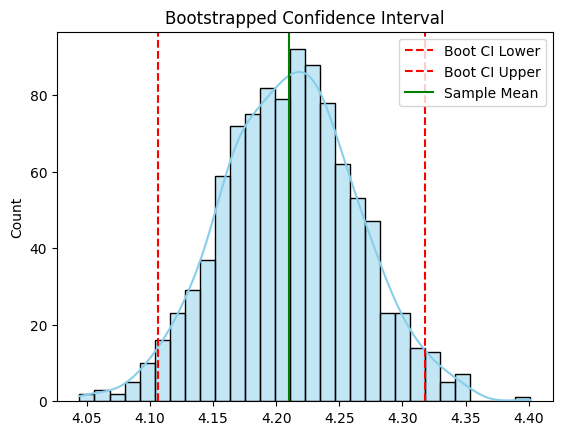

In [5]:
sns.histplot(boot_means, bins=30, kde=True, color='skyblue')
plt.axvline(boot_ci[0], color='red', linestyle='--', label='Boot CI Lower')
plt.axvline(boot_ci[1], color='red', linestyle='--', label='Boot CI Upper')
plt.axvline(mean, color='green', label='Sample Mean')
plt.title("Bootstrapped Confidence Interval")
plt.legend()
plt.show()

## 🧪 Practice Exercises
1. Simulate another sample with 100 customers and compute a 95% CI.
2. Use both `stats.t.interval()` and bootstrapping methods.
3. Compare CI width when n=30 vs n=100. What do you observe?

## 📌 Summary
- Confidence intervals give a **range**, not a guarantee
- Wider intervals = more uncertainty (smaller n or more variance)
- Bootstrapping is powerful when assumptions don’t hold

💡 **Thanks to your analysis**, Priya now knows the loyalty program likely improved satisfaction — with statistically backed confidence.